<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-02 16:02:38.038625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [4]:
epsilon = 0.95

constants_dict = {
    "GRIDSTEP": 0.005,
    "K": 5
}

target_data_dict = {
    "data_name": "Mushroom",
    "classes": [0, 1],
    "dims": "all",
    "dim_reduction": "UMAP",
    "other": ""
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [6]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples={0: 720}, calib_size=0.5)
setup_dict.keys()

Data loaded: ./../pickles/Mushroom-2labels-alldims-UMAP.pickle
sample dims: (5443, 2) | (2681, 2)
label dims: (5443,) | (2681,)
train labels: [0 1]
test labels: [0 1]
Start preparing grid: (5443, 2)
8400
1
Done preparing grid: (67200000, 2)

Train samples: (3539, 2)
{1: 0.8, 0: 0.2}
Test samples: (2681, 2)
{1: 0.52, 0: 0.48}
Prop: (1769, 2) (1769,) 
Calib: (1770, 2) (1770,)
X_prop: (1769, 2)
{1: 0.8, 0: 0.2}
X_calib: (1770, 2)
{1: 0.8, 0: 0.2}
[0, 1]


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(1770,)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(67200000,)


p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(67200000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

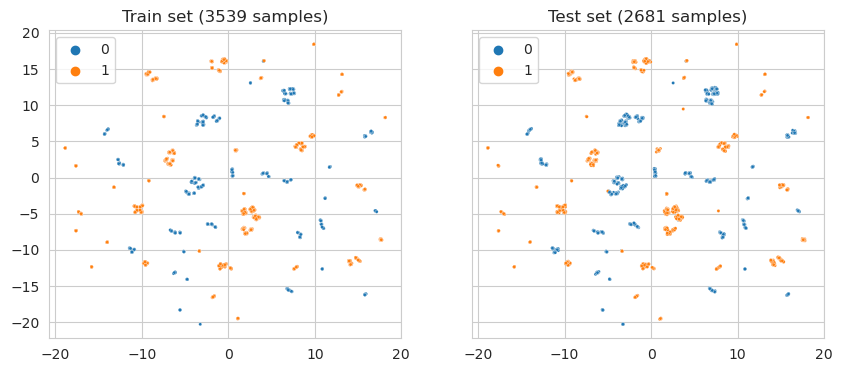

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

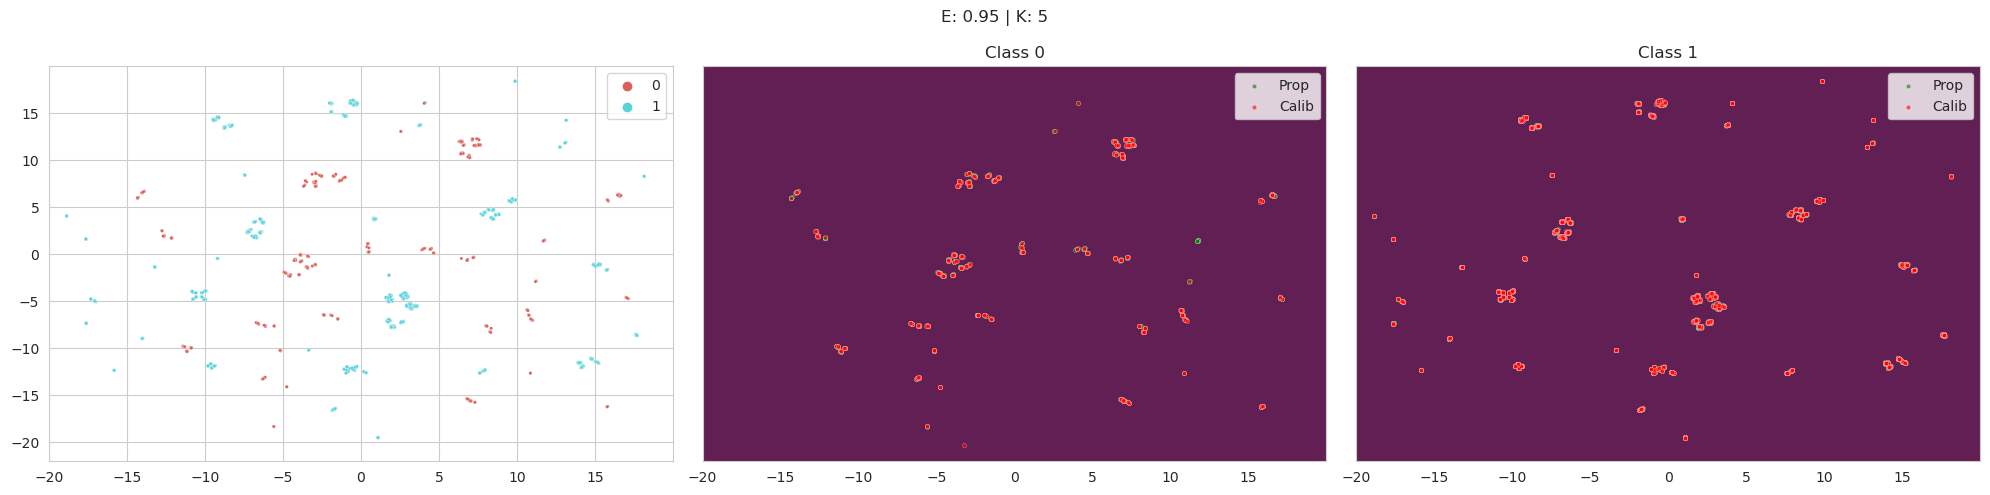

Synthetic samples per class
Label 0: (10884, 2)
Label 1: (283, 2)
(10884,)
(11167,)


2023-11-02 16:04:12.212483: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.17      0.28      1292
           1       0.56      1.00      0.72      1389

    accuracy                           0.60      2681
   macro avg       0.77      0.58      0.50      2681
weighted avg       0.76      0.60      0.51      2681



Total synthetic samples: (11167, 2)
Total O+S samples: (14706, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      0.98      0.82      1292
           1       0.97      0.62      0.76      1389

    accuracy                           0.80      2681
   macro avg       0.84      0.80      0.79      2681
weighted avg       0.85      0.80      0.79      2681



CLASS 0 | Total: (14423, 2) (synthetic (10884, 2) )
ORIGINAL+SYNTHETIC (CLASS 0)
84/84 [==============================] 

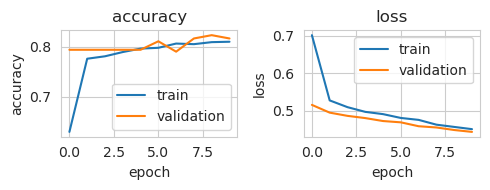

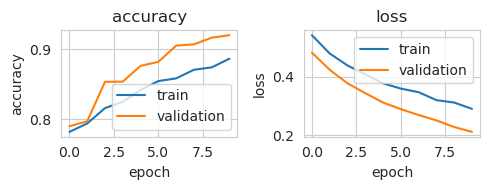

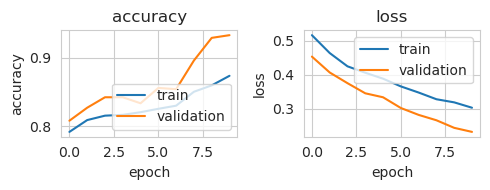

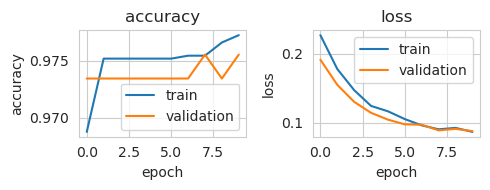

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=1)

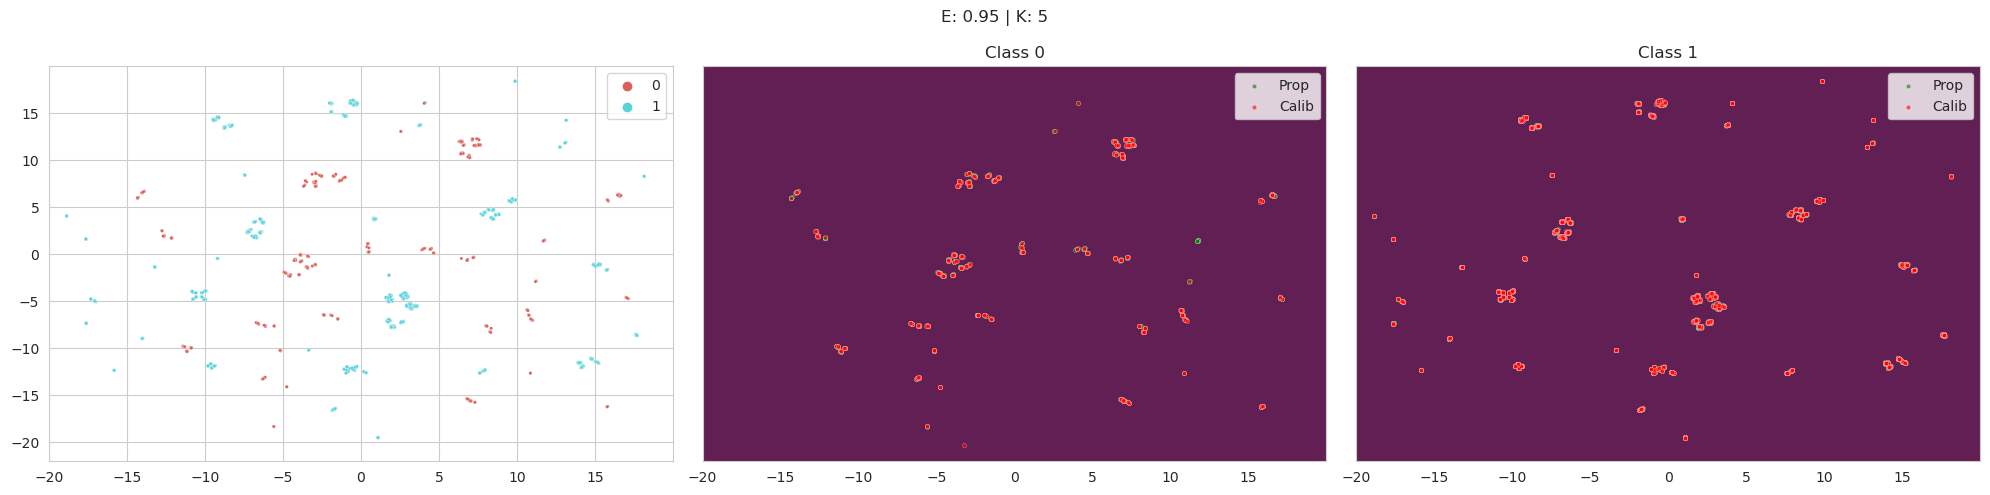

Synthetic samples per class
Label 0: (10884, 2)
Label 1: (283, 2)
(10884,)
(11167,)


Baseline results: ORIGINAL
84/84 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1292
           1       0.52      1.00      0.68      1389

    accuracy                           0.52      2681
   macro avg       0.26      0.50      0.34      2681
weighted avg       0.27      0.52      0.35      2681



Total synthetic samples: (11167, 2)
Total O+S samples: (14706, 2)


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

ORIGINAL + SYNTHETIC
84/84 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1292
           1       0.99      0.30      0.46      1389

    accuracy                           0.64      2681
   macro avg       0.78      0.65      0.59      2681
weighted avg       0.79      0.64      0.59      2681



CLASS 0 | Total: (14423, 2) (synthetic (10884, 2) )
ORIGINAL+SYNTHETIC (CLASS 0)
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.69      0.98      0.81      1292
           1       0.97      0.59      0.74      1389

    accuracy                           0.78      2681
   macro avg       0.83      0.79      0.77      2681
weighted avg       0.84      0.78      0.77      2681



Total synthetic samples: (11167, 2)
SYNTHETIC ONLY
84/84 [==============================] - 0s 2ms/step
              precision    rec

/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

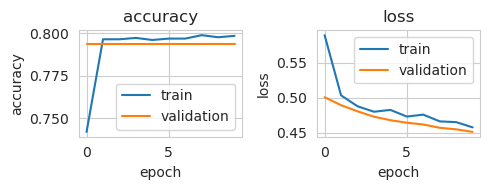

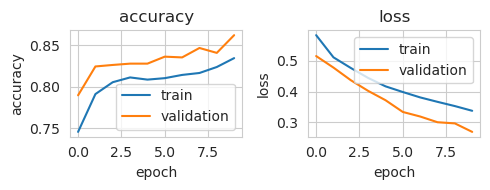

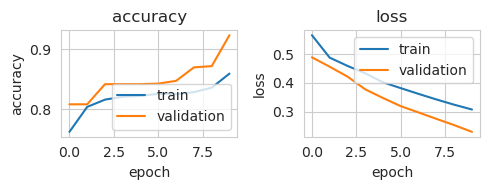

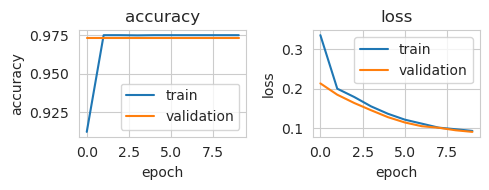

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=12)

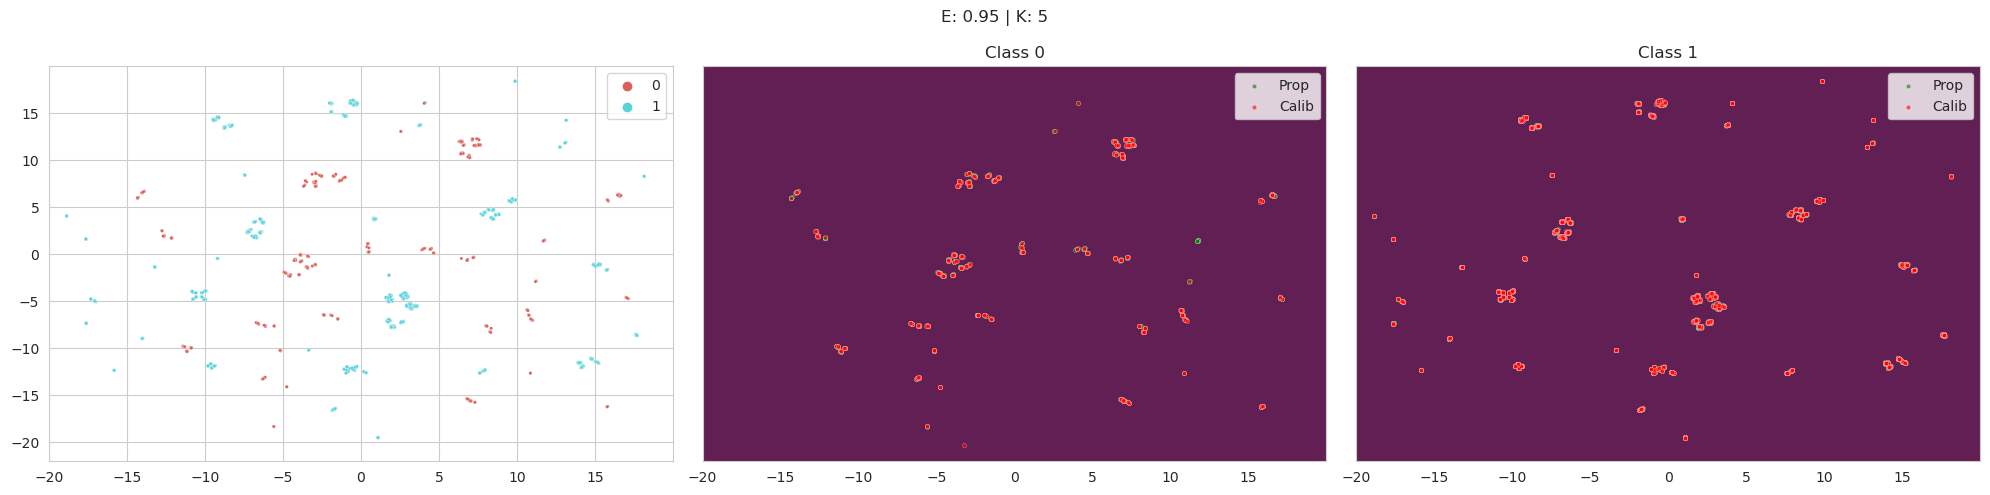

Synthetic samples per class
Label 0: (10884, 2)
Label 1: (283, 2)
(10884,)
(11167,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.21      0.35      1292
           1       0.58      1.00      0.73      1389

    accuracy                           0.62      2681
   macro avg       0.78      0.60      0.54      2681
weighted avg       0.77      0.62      0.55      2681



Total synthetic samples: (11167, 2)
Total O+S samples: (14706, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1292
           1       0.98      0.65      0.78      1389

    accuracy                           0.81      2681
   macro avg       0.85      0.81      0.80      2681
weighted avg       0.85      0.81      0.80      2681



CLASS 0 | Total: (14423, 2) (synthet

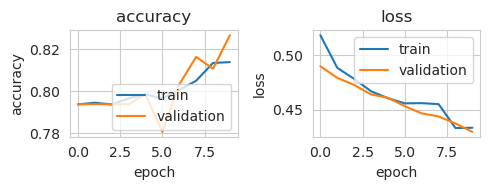

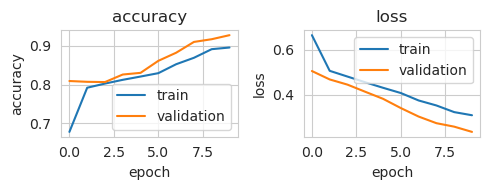

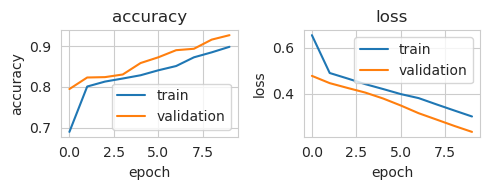

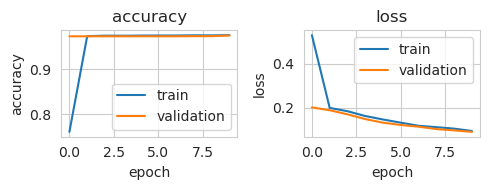

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=42)

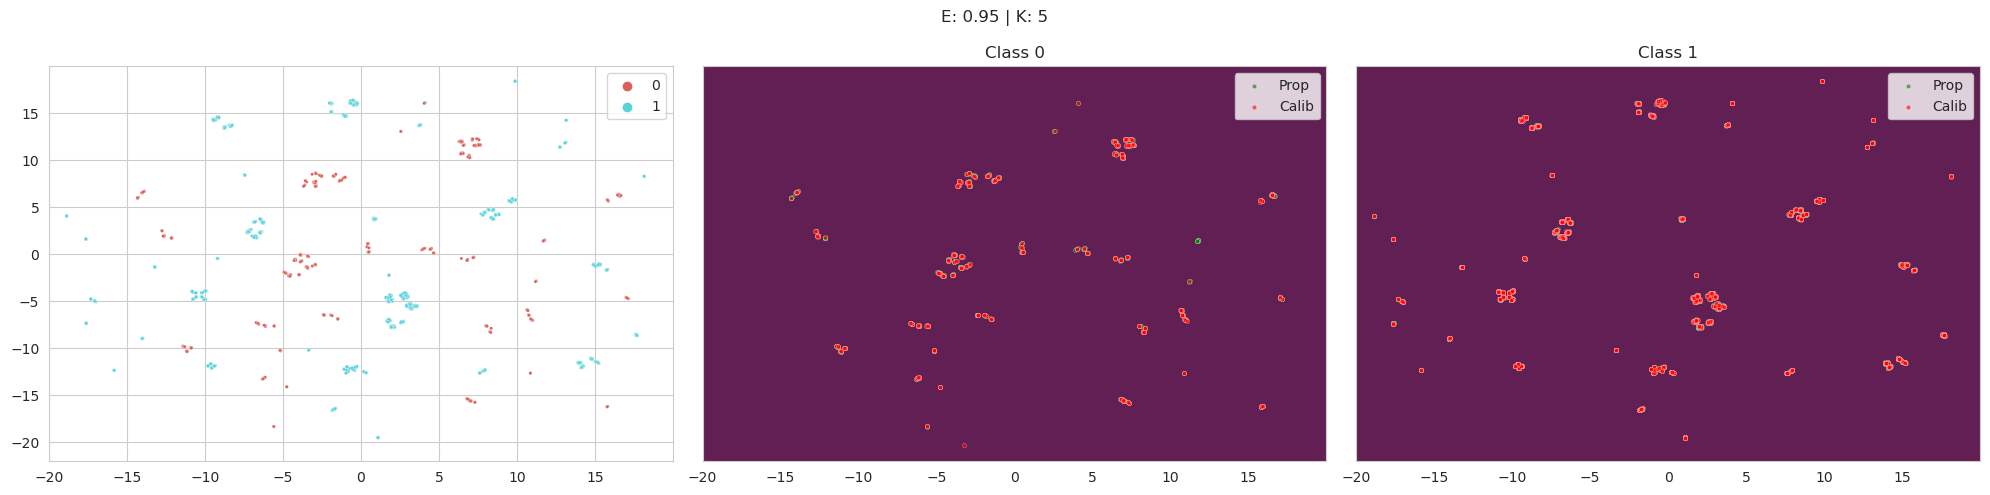

Synthetic samples per class
Label 0: (10884, 2)
Label 1: (283, 2)
(10884,)
(11167,)


Baseline results: ORIGINAL
84/84 [==============================] - 1s 9ms/step


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1292
           1       0.52      1.00      0.68      1389

    accuracy                           0.52      2681
   macro avg       0.26      0.50      0.34      2681
weighted avg       0.27      0.52      0.35      2681



Total synthetic samples: (11167, 2)
Total O+S samples: (14706, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.65      0.97      0.77      1292
           1       0.94      0.51      0.66      1389

    accuracy                           0.73      2681
   macro avg       0.79      0.74      0.72      2681
weighted avg       0.80      0.73      0.72      2681



CLASS 0 | Total: (14423, 2) (synthetic (10884, 2) )
ORIGINAL+SYNTHETIC (CLASS 0)
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0 

/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

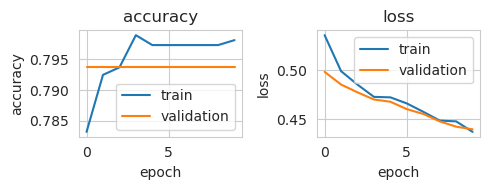

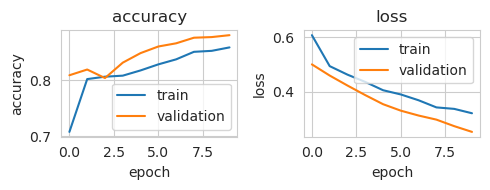

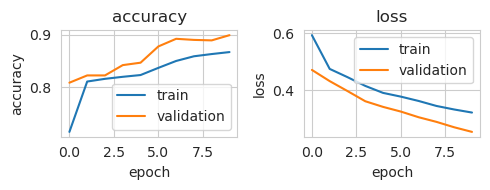

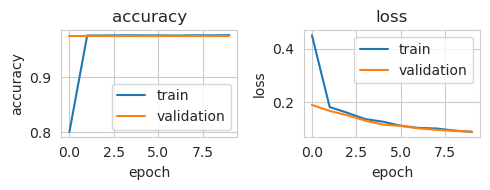

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=50)

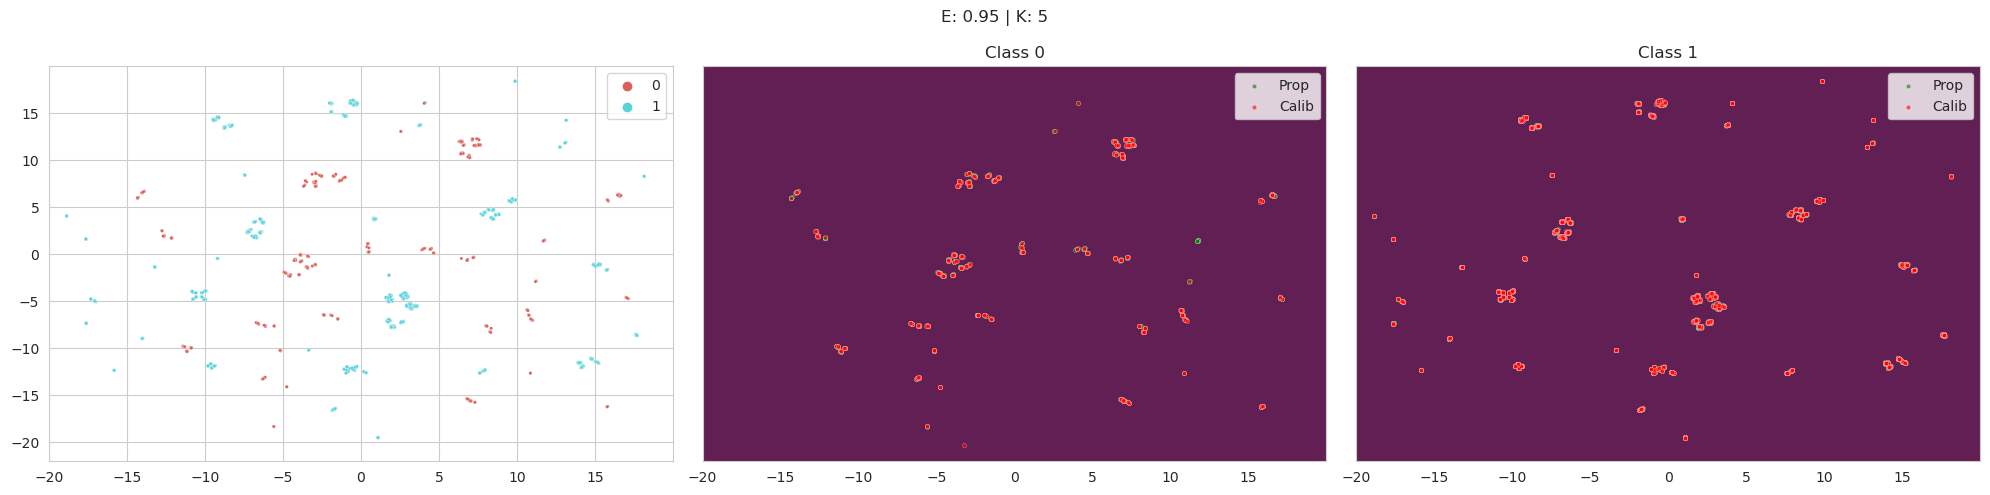

Synthetic samples per class
Label 0: (10884, 2)
Label 1: (283, 2)
(10884,)
(11167,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1292
           1       0.52      1.00      0.68      1389

    accuracy                           0.52      2681
   macro avg       0.26      0.50      0.34      2681
weighted avg       0.27      0.52      0.35      2681



Total synthetic samples: (11167, 2)
Total O+S samples: (14706, 2)
ORIGINAL + SYNTHETIC


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1292
           1       0.96      0.78      0.86      1389

    accuracy                           0.87      2681
   macro avg       0.88      0.87      0.87      2681
weighted avg       0.89      0.87      0.87      2681



CLASS 0 | Total: (14423, 2) (synthetic (10884, 2) )
ORIGINAL+SYNTHETIC (CLASS 0)
84/84 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1292
           1       0.97      0.64      0.77      1389

    accuracy                           0.80      2681
   macro avg       0.85      0.81      0.80      2681
weighted avg       0.85      0.80      0.80      2681



Total synthetic samples: (11167, 2)
SYNTHETIC ONLY
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   suppo

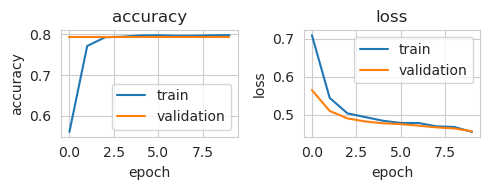

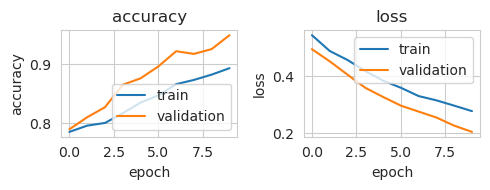

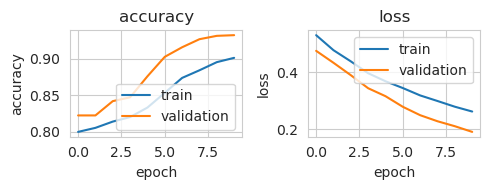

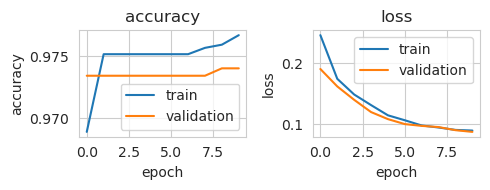

In [12]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=100)